# Decision Trees

## Training and Visualizing Decision Trees

To understand Decision Trees, let’s build one and take a look at how it makes predictions.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # petal length and petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

We can visualize the trained Decision Tree by first using the `export_graphviz()` method to ouput a graph definition file called *iris_tree.dot*:

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,out_file="./decision_tree_images/iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

Then we can use the dot command-line tool from the Graphviz package to convert this *.dot*
file to a variety of formats, such as PDF or PNG. This command line converts the *.dot* file
to a *.png* image file:

```bash
$ dot -Tpng iris_tree.dot -o iris_tree.png
```

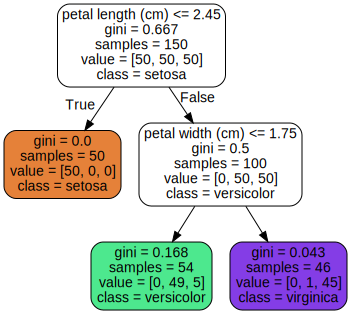

In [4]:
import os
from graphviz import Source

Source.from_file(os.path.join("decision_tree_images", "iris_tree.dot"))

# Our first decision tree looks like this

## Making Predictions

Let's see how the tree represented in above figure makes predictions. Suppose we find an iris flower and want to classify it. We start at the root node (depth 0, at the top): this node asks whether flower's petal length is less than 2.45 cm. If yes, we move down to the root's left child node (depth 1, left). In this case it is *leaf node* (i.e., it does not have any child nodes), so it does not ask any questions: simply look at the predicted class for that node, and the Decision Tree predicts that flower is an *Iris Setosa* (`class=setosa`)

Now suppose we find another flower, and this time flower's petal length is greater than 2.45 cm. We must move down to root's right child node (depth 1, right), which is not leaf node, so the node asks the question: is the petal width smaller than 1.75 cm? If it is, then flower is most likely *Iris Versicolor* (depth 2, left). If not, it is likely it is likely an *Iris Virginica* (depth 2, right).

**NOTE:**

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they don’t require feature scaling or centering at all.

A node's `samples` attribute counts how many training instances it applies to. For example, 100 training instances have petal length greater than 2.45 cm (depth 1, right) , and those of 100, 54 have petal width smaller than 1.75 cm (depth 2, left).

A nodes's `value` attribute tells us how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 *Iris Setosa*, 1 *Iris Versicolor* and 45 *Iris Virginica*.

Node's `gini` attribute measures its *impurity*: a node is "pure" (`gini = 0`) if all training instances it applies belong to the same class. For example: since the depth-1 left node node applies only to *Iris Setosa* training instances, it is pure and is `gini score` is 0.

**NOTE:**

Scikit-Learn uses the CART algorithm, which produces only *binary trees*: nonleaf nodes always have two children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.